In [11]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import shutil
import os
import time
import sys
from pathlib import Path
import functools
print = functools.partial(print, flush=True)

interest_num = [3,6]
img_size = 28
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1
inference_batch_size = 32

print("="*100)
print("Demo 1 on MNIST. This script is for data generation.")
print("\tStart at:",time.strftime("%m/%d/%Y %H:%M:%S"))
print("\tProblems and issues, please contact Dr. Weiwen Jiang (wjiang2@nd.edu)")
print("\tEnjoy and Good Luck!")
print("="*100)
print()

Demo 1 on MNIST. This script is for data generation.
	Start at: 08/05/2020 18:30:07
	Problems and issues, please contact Dr. Weiwen Jiang (wjiang2@nd.edu)
	Enjoy and Good Luck!



In [9]:
def modify_target(target):
    for j in range(len(target)):
        for idx in range(len(interest_num)):
            if target[j] == interest_num[idx]:
                target[j] = idx
                break
    
    new_target = torch.zeros(target.shape[0],2)
        
    for i in range(target.shape[0]):        
        if target[i].item() == 0:            
            new_target[i] = torch.tensor([1,0]).clone()     
        else:
            new_target[i] = torch.tensor([0,1]).clone()
               
    return target,new_target

def select_num(dataset,interest_num):
    labels = dataset.targets #get labels
    labels = labels.numpy()
    idx = {}
    for num in interest_num:
        idx[num] = np.where(labels == num)
        
    fin_idx = idx[interest_num[0]]
    for i in range(1,len(interest_num)):           
        
        fin_idx = (np.concatenate((fin_idx[0],idx[interest_num[i]][0])),)
    
    fin_idx = fin_idx[0]    
    
    dataset.targets = labels[fin_idx]
    dataset.data = dataset.data[fin_idx]
    
    # print(dataset.targets.shape)
    
    dataset.targets,_ = modify_target(dataset.targets)
    # print(dataset.targets.shape)
    
    return dataset

def qc_input_trans(dataset):
    dataset.data = dataset.data
    return dataset


class ToQuantumData(object):
    def __call__(self, tensor):        
        data = tensor                
        input_vec = data.view(-1)
        vec_len = input_vec.size()[0]
        input_matrix = torch.zeros(vec_len,vec_len)
        input_matrix[0] = input_vec
        input_matrix = input_matrix.transpose(0,1)        
        u,s,v = np.linalg.svd(input_matrix)    
        output_matrix = torch.tensor(np.dot(u,v))            
        output_data = output_matrix[:,0].view(1,img_size,img_size)    
        return output_data
    

class ToQuantumMatrix(object):
    def __call__(self, tensor):        
        data = tensor                
        input_vec = data.view(-1)
        vec_len = input_vec.size()[0]
        input_matrix = torch.zeros(vec_len,vec_len)
        input_matrix[0] = input_vec
        input_matrix = input_matrix.transpose(0,1)        
        u,s,v = np.linalg.svd(input_matrix)    
        output_matrix = torch.tensor(np.dot(u,v))                        
        return output_matrix
                

# convert data to torch.FloatTensor
transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                transforms.ToTensor()])
# transform = transforms.Compose([transforms.Resize((img_size,img_size)),
#                                 transforms.ToTensor(),ToQuantumData()])
# transform = transforms.Compose([transforms.Resize((img_size,img_size)),transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])
# choose the training and test datasets

# Path to MNIST Dataset
train_data = datasets.MNIST(root='../../pytorch/data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='../../pytorch/data', train=False,
                                  download=True, transform=transform)

train_data = select_num(train_data,interest_num)
test_data =  select_num(test_data,interest_num)

# train_data = qc_input_trans(train_data)

# imshow(torchvision.utils.make_grid(train_data[0][0]))
# 
# sys.exit(0)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers, shuffle=True, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=inference_batch_size, 
    num_workers=num_workers, shuffle=True, drop_last=True)

def save_checkpoint(state, is_best, save_path, filename):
    filename = os.path.join(save_path, filename)
    torch.save(state, filename)
    if is_best:
        bestname = os.path.join(save_path, 'model_best.tar')
        shutil.copyfile(filename, bestname)


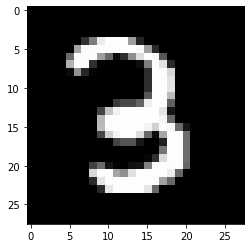

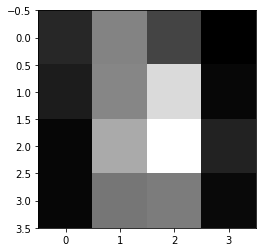

0.08625819534063339,-0.28465205430984497,-0.1466389298439026,0.0,-0.060380734503269196,-0.2889649569988251,-0.47010713815689087,-0.01725163869559765,-0.012938729487359524,-0.36659732460975647,-0.5520524382591248,-0.0733194649219513,-0.012938729487359524,-0.2544616758823395,-0.2674003839492798,-0.021564548835158348,
0.28465205430984497,0.9254074096679688,-0.038426473736763,0.0,-0.01582266576588154,-0.07572276145219803,-0.1231907531619072,-0.004520761780440807,-0.003390571102499962,-0.0960661843419075,-0.14466437697410583,-0.0192132368683815,-0.003390571102499962,-0.06668122857809067,-0.07007180154323578,-0.0056509519927203655,
0.1466389298439026,-0.038426473736763,0.9802045226097107,0.0,-0.008151070214807987,-0.039008695632219315,-0.06346189975738525,-0.0023288773372769356,-0.0017466578865423799,-0.04948864132165909,-0.07452407479286194,-0.009897728450596333,-0.0017466578865423799,-0.034350939095020294,-0.03609759360551834,-0.002911096438765526,
0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# functions to show an image
from matplotlib import cm


def imshow(img):
    img = img
    npimg = img.numpy()
    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    
    plt.show()
    
    image = np.asarray(npimg[0] * 255, np.uint8)    
    
    im = Image.fromarray(image,mode="L")
    im.save("32*32.jpg",cmap="gray") 
    im = im.resize((4,4),Image.BILINEAR)    
    
    plt.imshow(im,cmap='gray',)
    
    trans_to_tensor = transforms.ToTensor()
    trans_to_matrix = ToQuantumMatrix()
    plt.show()
    im.save("4*4.jpg",cmap="gray") 
    
    # print(trans_to_tensor(im))
    for row in trans_to_matrix(trans_to_tensor(im)).tolist():
        for num in row:
            print(num,end=",")
        print()

    
for batch_idx, (data, target) in enumerate(train_loader):
    torch.set_printoptions(threshold=sys.maxsize)
    imshow(torchvision.utils.make_grid(data))
    break



